In [1]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pynauty import Graph, autgrp

NUMBER_OF_GRAPHS = 4985


In [2]:
graphs = nx.read_graph6("positive_graphs.g6")
pynauty_graphs = []
nodes_counts = np.zeros(NUMBER_OF_GRAPHS)
for i, graph in enumerate(graphs):
    num_of_nodes = int(graph.number_of_nodes())
    nodes_counts[i] = num_of_nodes
    pynauty_graph = Graph(num_of_nodes)
    pynauty_graph.set_adjacency_dict(dict(graph.adjacency()))
    pynauty_graphs.append((pynauty_graph, num_of_nodes, graph.edges()))

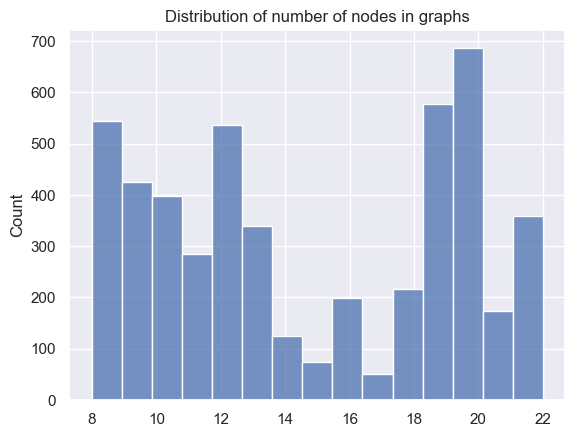

In [3]:

sns.set_theme()
sns.histplot(nodes_counts, bins=15).set(title="Distribution of number of nodes in graphs")
plt.show()

In [4]:
min_nodes = np.min(nodes_counts)
max_nodes = np.max(nodes_counts)
avg_nodes = np.mean(nodes_counts)
print(f"Min number of nodes: {min_nodes}")
print(f"Max number of nodes: {max_nodes}")
print(f"Avg number of nodes: {avg_nodes}")

Min number of nodes: 8.0
Max number of nodes: 22.0
Avg number of nodes: 14.66740220661986


In [5]:
group_sizes = np.zeros(NUMBER_OF_GRAPHS)
for i, (Graph, num_of_nodes, edge_list) in enumerate(pynauty_graphs):
    generators_raw, grpsize1, grpsize2, _, _ = autgrp(Graph)
    group_size = grpsize1 * 10**grpsize2
    group_sizes[i] = group_size

In [6]:
min_group_size = np.min(group_sizes)
max_group_size = np.max(group_sizes)
avg_group_size = np.mean(group_sizes)
print(f"Min automorphism group size: {min_group_size}")
print(f"Max automorphism group size: {max_group_size}")
print(f"Avg automorphism group size: {avg_group_size}")

Min automorphism group size: 2.0
Max automorphism group size: 19200.0
Avg automorphism group size: 89.22627883650952


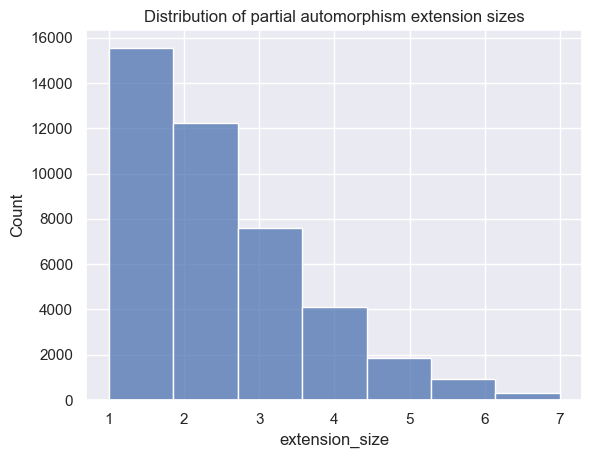

Min extension size: 1.0
Max extension size: 7
Avg extension size: 2.2593123209169055


In [7]:
df = pd.read_csv("partial_automorphism_sizes.csv")
sns.set_theme() 
sns.histplot(df["extension_size"].where(df["extension_size"] != 0), bins=7).set(title="Distribution of partial automorphism extension sizes") 
plt.show() 
min_extension_size = np.min(df["extension_size"].where(df["extension_size"] != 0))
max_extension_size = np.max(df["extension_size"])
avg_extension_size = np.mean(df["extension_size"].where(df["extension_size"] != 0)) 
print(f"Min extension size: {min_extension_size}") 
print(f"Max extension size: {max_extension_size}") 
print(f"Avg extension size: {avg_extension_size}")

In [8]:
train_positives = df[(df["extension_size"] == 0) & (df["dataset_type"] == "train")].shape[0]
train_negatives = df[(df["extension_size"] > 0) & (df["dataset_type"] == "train")].shape[0]
val_positives = df[(df["extension_size"] == 0) & (df["dataset_type"] == "val")].shape[0]
val_negatives = df[(df["extension_size"] > 0) & (df["dataset_type"] == "val")].shape[0]
print(f"positive examples in training set: {train_positives}")
print(f"negative examples in training set: {train_negatives}")
print(f"positive examples in validation set: {val_positives}")
print(f"negative examples in validation set: {val_negatives}")
print(f"Ratio of positive to negative examples: {(train_positives + val_positives) / (train_negatives + val_negatives)}")


positive examples in training set: 39289
negative examples in training set: 34144
positive examples in validation set: 9816
negative examples in validation set: 8434
Ratio of positive to negative examples: 1.153295128939828


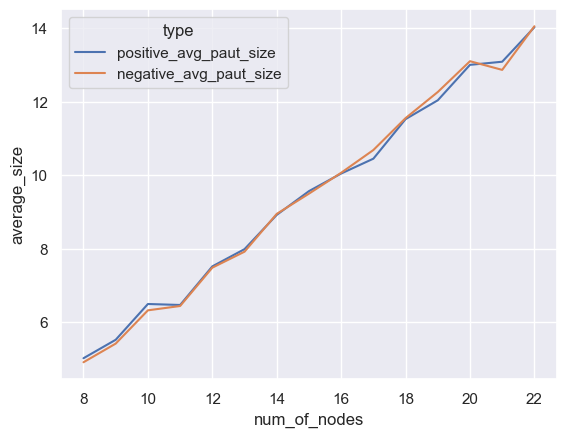

In [9]:
df["total_paut_size"] = df["original_paut_size"] + df["extension_size"]

positive_avg_paut_size = (
    df[df["extension_size"] == 0]
    .groupby("num_of_nodes")["original_paut_size"]
    .mean()
    .reset_index(name="positive_avg_paut_size")
)

negative_avg_paut_size = (
    df[df["extension_size"] != 0].groupby("num_of_nodes")["total_paut_size"]
    .mean()
    .reset_index(name="negative_avg_paut_size")
)

plot_df = positive_avg_paut_size.merge(negative_avg_paut_size, on="num_of_nodes", how="outer")

plot_df = plot_df.melt(
    id_vars="num_of_nodes",
    value_vars=["positive_avg_paut_size", "negative_avg_paut_size"],
    var_name="type",
    value_name="average_size"
)

sns.lineplot(data=plot_df, x="num_of_nodes", y="average_size", hue="type")
plt.show()

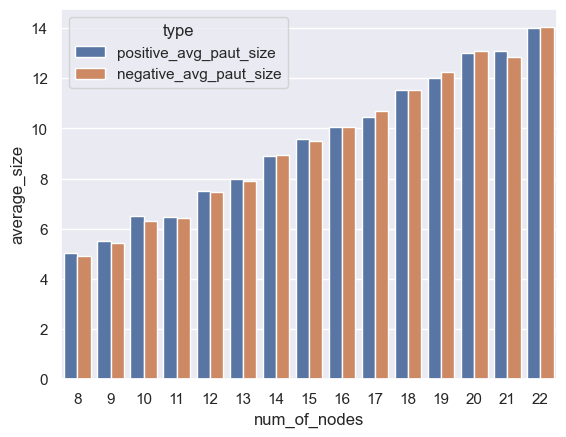

In [10]:
sns.barplot(
    data=plot_df,
    x="num_of_nodes",
    y="average_size",
    hue="type",
)
plt.show()